In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

import numpy as np
from skimage import io, img_as_ubyte

import torch
from utils.uce import uceloss

import seaborn as sns
sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

In [3]:
img = 0
out_path = f'./test_results/sr_{img}'
Path(out_path).mkdir(parents=True, exist_ok=True)

if img == 0:
    run_1 = np.load("/media/laves/test_logs_dip_sr_0/1629269171.0258245/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_0/1629303673.1778271/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_0/1629269797.6519053/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_0/1629269176.501618/save.npz", allow_pickle=True)
elif img == 1:
    run_1 = np.load("/media/laves/test_logs_dip_sr_1/1629223190.2233813/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_1/1629223193.140846/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_1/1629223195.2475502/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_1/1629223197.160243/save.npz", allow_pickle=True)
elif img == 2:
    run_1 = np.load("/media/laves/test_logs_dip_sr_2/1629275960.6346152/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_2/1629276946.3382604/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_2/1629275961.3306873/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_2/1629275962.223516/save.npz", allow_pickle=True)
elif img == 3:
    run_1 = np.load("/media/laves/test_logs_dip_sr_3/1629279532.5278838/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_3/1629279533.2777786/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_3/1629279534.2149403/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_3/1629279535.1453726/save.npz", allow_pickle=True)
elif img == 4:
    run_1 = np.load("/media/laves/test_logs_dip_sr_4/1629282367.1628494/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_4/1629282369.5982094/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_4/1629282371.420261/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_4/1629282373.1502135/save.npz", allow_pickle=True)
elif img == 5:
    run_1 = np.load("/media/laves/test_logs_dip_sr_5/1629287299.460315/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_5/1629289799.2479732/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_5/1629287302.2377422/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_5/1629287304.9261446/save.npz", allow_pickle=True)
elif img == 6:
    run_1 = np.load("/media/laves/test_logs_dip_sr_6/1629292481.7928514/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_6/1629292486.0805764/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_6/1629292503.8597038/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_6/1629292515.497806/save.npz", allow_pickle=True)
elif img == 7:
    run_1 = np.load("/media/laves/test_logs_dip_sr_7/1629295247.5447004/save.npz", allow_pickle=True)
    run_2 = np.load("/media/laves/test_logs_mfvi_sr_7/1629295296.075827/save.npz", allow_pickle=True)
    run_3 = np.load("/media/laves/test_logs_mcd_sr_7/1629295250.5162883/save.npz", allow_pickle=True)
    run_4 = np.load("/media/laves/test_logs_sgld_sr_7/1629295263.6285937/save.npz", allow_pickle=True)
else:
    assert False

# PSNR

In [4]:
psnrs_1 = run_1['psnrs'].flat[0]
psnrs_2 = run_2['psnrs'].flat[0]
psnrs_3 = run_3['psnrs'].flat[0]
psnrs_4 = run_4['psnrs'].flat[0]

In [5]:
# take last 10 reconstructions from 3 runs to compute mean and std (psnr_gt_sm)

print(f'dip  {np.round(np.mean(psnrs_1["dip"][-100:,2]), 2)}')
print(f'mcd  {np.round(np.mean(psnrs_3["mcd"][-100:,2]), 2)}')
print(f'sgld {np.round(np.mean(psnrs_4["sgld"][-100:,2]), 2)}')
print(f'mfvi {np.round(np.mean(psnrs_2["mfvi"][-100:,2]), 2)}')

dip  29.2
mcd  29.38
sgld 29.82
mfvi 29.83


In [6]:
# early stopping

print(f'dip  {np.round(np.max(psnrs_1["dip"][:,2]), 2)}')
print(f'mcd  {np.round(np.max(psnrs_3["mcd"][:,2]), 2)}')
print(f'sgld {np.round(np.max(psnrs_4["sgld"][:,2]), 2)}')
print(f'mfvi {np.round(np.max(psnrs_2["mfvi"][:,2]), 2)}')

dip  30.63
mcd  29.61
sgld 30.35
mfvi 29.96


# SSIM

In [7]:
ssims_1 = run_1['ssims'].flat[0]
ssims_2 = run_2['ssims'].flat[0]
ssims_3 = run_3['ssims'].flat[0]
ssims_4 = run_4['ssims'].flat[0]

In [8]:
# take last 10 reconstructions from 3 runs to compute mean and std

print(f'dip  {np.round(np.mean(ssims_1["dip"][-100:,2]), 3)}')
print(f'mcd  {np.round(np.mean(ssims_3["mcd"][-100:,2]), 3)}')
print(f'sgld {np.round(np.mean(ssims_4["sgld"][-100:,2]), 3)}')
print(f'mfvi {np.round(np.mean(ssims_2["mfvi"][-100:,2]), 3)}')

dip  0.882
mcd  0.889
sgld 0.888
mfvi 0.893


In [9]:
# early stopping

print(f'dip  {np.round(np.max(ssims_1["dip"][:,2]), 3)}')
print(f'mcd  {np.round(np.max(ssims_3["mcd"][:,2]), 3)}')
print(f'sgld {np.round(np.max(ssims_4["sgld"][:,2]), 3)}')
print(f'mfvi {np.round(np.max(ssims_2["mfvi"][:,2]), 3)}')

dip  0.899
mcd  0.891
sgld 0.894
mfvi 0.894


# Figures

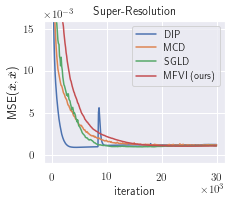

In [10]:
fig, ax0 = plt.subplots(1, 1, figsize=(3.5, 3))

losses_1 = run_1['mse_gt'].flat[0]
losses_2 = run_2['mse_gt'].flat[0]
losses_3 = run_3['mse_gt'].flat[0]
losses_4 = run_4['mse_gt'].flat[0]

ax0.plot(range(len(losses_1['dip']))[::100], losses_1['dip'][::100], label='DIP')
ax0.plot(range(len(losses_3['mcd']))[::100],  losses_3['mcd'][::100], label='MCD')
ax0.plot(range(len(losses_4['sgld']))[::100], losses_4['sgld'][::100], label='SGLD')
ax0.plot(range(len(losses_2['mfvi']))[::100], losses_2['mfvi'][::100], label='MFVI (ours)')
#ax0.fill_between(range(len(loss))[::100], loss[::100]+5*std[::100], loss[::100]-5*std[::100], alpha=0.3)
ax0.set_title(f"Super-Resolution")
ax0.set_xlabel('iteration')
ax0.set_ylabel(r'MSE($\hat{\bm{x}}, \tilde{\bm{x}}$)')
ax0.set_ylim(-0.001,0.016)
ax0.grid(True)
ax0.legend(fontsize=10)

ax0.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))
ax0.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))

fig.tight_layout()
fig.savefig(f'{out_path}/mse_sr_{img}.pdf', bbox_inches='tight')

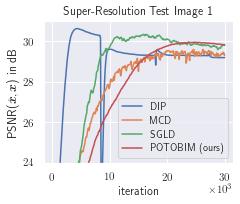

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

ax.plot(range(len(psnrs_1['dip']))[::100], psnrs_1['dip'][::100,2], label='DIP')
ax.plot(range(len(psnrs_3['mcd']))[::100], psnrs_3['mcd'][::100,2], label='MCD')
ax.plot(range(len(psnrs_4['sgld']))[::100], psnrs_4['sgld'][::100,2], label='SGLD')
ax.plot(range(len(psnrs_2['mfvi']))[::100], psnrs_2['mfvi'][::100,2], label='POTOBIM (ours)')
ax.set_title(f"Super-Resolution Test Image {img+1}")
ax.set_xlabel('iteration')
ax.set_ylabel(r'PSNR($\hat{\bm{x}}, \bm{x}$) in dB')
ax.set_ylim([24, 31])
ax.legend(fontsize=10)
    
ax.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))

fig.tight_layout()
fig.savefig(f"{out_path}/psnr_sr_{img}.pdf", bbox_inches='tight')

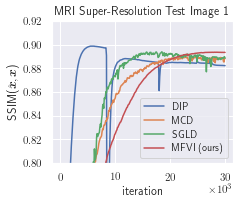

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

ax.plot(range(len(ssims_1["dip"]))[::100], ssims_1["dip"][::100,2], label="DIP")
ax.plot(range(len(ssims_3["mcd"]))[::100], ssims_3["mcd"][::100,2], label="MCD")
ax.plot(range(len(ssims_4["sgld"]))[::100], ssims_4["sgld"][::100,2], label="SGLD")
ax.plot(range(len(ssims_2["mfvi"]))[::100], ssims_2["mfvi"][::100,2], label="MFVI (ours)")
ax.set_title(f"MRI Super-Resolution Test Image {img+1}")
ax.set_xlabel('iteration')
ax.set_ylabel(r'SSIM($\hat{\bm{x}}, \bm{x}$)')
ax.set_ylim([0.8, 0.92])
ax.legend(fontsize=10)

ax.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))

fig.tight_layout()
fig.savefig(f"{out_path}/ssim_sr_{img}.pdf", bbox_inches='tight')

# Reconstructed images

In [13]:
## after convergence

recons_1 = run_1['recons'].flat[0]['dip']
recons_2 = run_2['recons'].flat[0]['mfvi']
recons_3 = run_3['recons'].flat[0]['mcd']
recons_4 = run_4['recons'].flat[0]['sgld']

io.imsave(f'{out_path}/recon_ct_{img}_dip.png', img_as_ubyte(recons_1[-1][0]))
io.imsave(f'{out_path}/recon_ct_{img}_mfvi.png', img_as_ubyte(recons_2[-1][0]))
io.imsave(f'{out_path}/recon_ct_{img}_mcd.png', img_as_ubyte(recons_3[-1][0]))
io.imsave(f'{out_path}/recon_ct_{img}_sgld.png', img_as_ubyte(recons_4[-1][0]))

# UCE

In [14]:
img_hr = run_1['img_hr']
img_lr = run_1['img_lr']

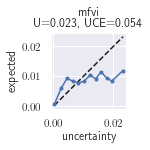

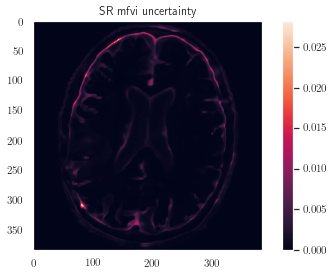

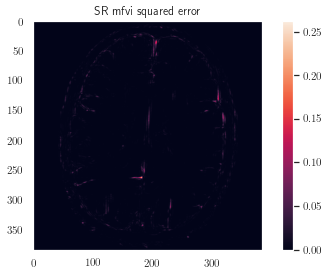

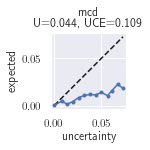

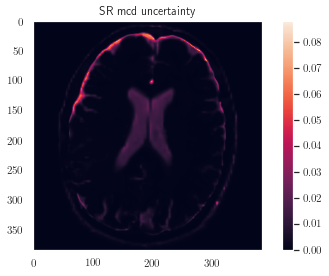

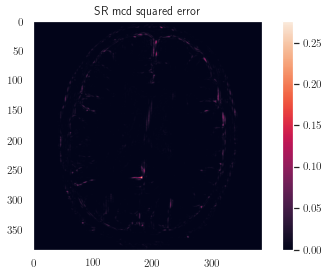

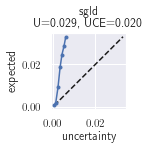

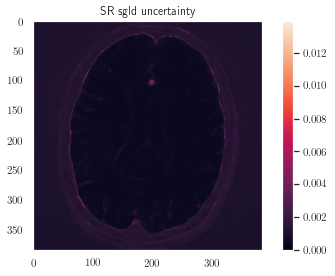

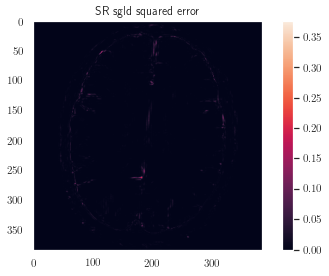

In [15]:
for i, method in enumerate(['mfvi', 'mcd', 'sgld']):
    exec(f'recon = recons_{i+2}')
    exec(f'run = run_{i+2}')
    uncert_1 = run['uncerts'].flat[0][method][-1]
    uncert_ale_1 = run['uncerts_ale'].flat[0][method][-1]

    errs = torch.tensor(img_hr)-torch.tensor(recon[-1][0])
    errs = errs[0]

    uncerts_epi = torch.tensor(uncert_1)
    uncerts_ale = torch.tensor(uncert_ale_1)

    imgs_mc = recon[-25:].transpose(1,0,2,3)
    errvar = ((imgs_mc-img_hr.repeat(25,axis=0))**2).mean(axis=(0,1))
    errs = torch.tensor(errvar).unsqueeze(0).sqrt()
    
    uncerts = (uncerts_epi + uncerts_ale)
    uce, _, _, _ = uceloss(errs**2, uncerts, n_bins=15)
    _, err, uncert, _ = uceloss(errs**2, uncerts, n_bins=15, outlier=1e-4)

    fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.25))
    max_val = np.max([err.max(), uncert.max()])
    min_val = np.min([err.min(), uncert.min()])
    ax.plot([min_val, max_val], [min_val, max_val], 'k--')
    ax.plot(uncert, err, marker='.')
    ax.set_ylabel(r'expected')
    ax.set_xlabel(r'uncertainty')
    ax.set_aspect(1)
    fig.tight_layout()

    ax.set_title(f'{method}\nU={uncerts.mean().sqrt().item():.3f}, UCE={uce.item()*100:.3f}')
    fig.tight_layout()
    fig.savefig(f'{out_path}/calib_ct_{method}_1.pdf', bbox_inches='tight')
    
    ## save uncert map
    plt.figure()
    plt.imshow(uncerts[0].numpy(), vmin=0)
    plt.grid(False)
    plt.colorbar()
    plt.title(f'SR {method} uncertainty')
    plt.tight_layout()
    plt.savefig(f'{out_path}/uncert_map_sr_{img}_{method}.pdf', bbox_inches='tight')
    
    ## save error map
    plt.figure()
    plt.imshow(errs.numpy()[0]**2, vmin=0)
    plt.grid(False)
    plt.colorbar()
    plt.title(f'SR {method} squared error')
    plt.tight_layout()
    plt.savefig(f'{out_path}/error_map_sr_{img}_{method}.pdf', bbox_inches='tight')

In [16]:
img_hr = run_1['img_hr']
img_lr = run_1['img_lr']

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(10, 3))

titles = [
    'SGLD\nuncertainty',
    'SGLD\nerror',
]

uncert_1 = run_3['uncerts'].flat[0]['mcd'][-1]
uncert_ale_1 = run_3['uncerts_ale'].flat[0]['mcd'][-1]
errs = torch.tensor(img_hr)-torch.tensor(recon[-1][0])[0]
uncerts_epi = torch.tensor(uncert_1)
uncerts_ale = torch.tensor(uncert_ale_1)
imgs_mc = recons_3[-25:].transpose(1,0,2,3)
errvar = ((imgs_mc-img_hr.repeat(25,axis=0))**2).mean(axis=(0,1))
errs = torch.tensor(errvar).sqrt().numpy()**2
uncerts = (uncerts_epi + uncerts_ale)[0].numpy()
ax[0].imshow(errs, vmin=0, vmax=10*np.mean(errs))
ax[0].set_title('MCD\nerror')
ax[1].imshow(uncerts, vmin=0, vmax=10*np.mean(uncerts))
ax[1].set_title('MCD\nuncertainty')

uncert_1 = run_4['uncerts'].flat[0]['sgld'][-1]
uncert_ale_1 = run_4['uncerts_ale'].flat[0]['sgld'][-1]
errs = torch.tensor(img_hr)-torch.tensor(recon[-1][0])[0]
uncerts_epi = torch.tensor(uncert_1)
uncerts_ale = torch.tensor(uncert_ale_1)
imgs_mc = recons_4[-25:].transpose(1,0,2,3)
errvar = ((imgs_mc-img_hr.repeat(25,axis=0))**2).mean(axis=(0,1))
errs = torch.tensor(errvar).sqrt().numpy()**2
uncerts = (uncerts_epi + uncerts_ale)[0].numpy()
ax[2].imshow(errs, vmin=0, vmax=10*np.mean(errs))
ax[2].set_title('SGLD\nerror')
ax[3].imshow(uncerts, vmin=0, vmax=10*np.mean(uncerts))
ax[3].set_title('SGLD\nuncertainty')
  
uncert_1 = run_2['uncerts'].flat[0]['mfvi'][-1]
uncert_ale_1 = run_2['uncerts_ale'].flat[0]['mfvi'][-1]
errs = torch.tensor(img_hr)-torch.tensor(recon[-1][0])[0]
uncerts_epi = torch.tensor(uncert_1)
uncerts_ale = torch.tensor(uncert_ale_1)
imgs_mc = recons_2[-25:].transpose(1,0,2,3)
errvar = ((imgs_mc-img_hr.repeat(25,axis=0))**2).mean(axis=(0,1))
errs = torch.tensor(errvar).sqrt().numpy()**2
uncerts = (uncerts_epi + uncerts_ale)[0].numpy()
ax[4].imshow(errs, vmin=0, vmax=10*np.mean(errs))
ax[4].set_title('POTOBIM\nerror')
ax[5].imshow(uncerts, vmin=0, vmax=10*np.mean(uncerts))
ax[5].set_title('POTOBIM\nuncertainty')

[a.set_axis_off() for a in ax]
fig.tight_layout()
fig.savefig(f'{out_path}/error_uncert_sr_{img}_all.pdf', bbox_inches='tight', dpi=300)

In [ ]:
import numpy as np
from radon import FastRadonTransform
from bayesian_optimization import get_img_ct
from matplotlib import pyplot as plt
from skimage.transform import rescale
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

fig, ax = plt.subplots(1, 6, figsize=(10, 3))

ax[0].imshow(img_hr[0,192:,40:232], cmap='gray', vmin=0, vmax=1)
ax[0].set_title('ground truth')

recon = rescale(img_lr, 4)
ax[1].imshow(recon[192:,40:232], cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Bilinear')

ax[2].imshow(recons_1[-1][0,192:,40:232], cmap='gray', vmin=0, vmax=1)
ax[2].set_title('DIP')

ax[3].imshow(recons_3[-25:].mean(axis=(0,1))[192:,40:232], cmap='gray', vmin=0, vmax=1)
ax[3].set_title('MCD')

ax[4].imshow(recons_4[-25:].mean(axis=(0,1))[192:,40:232], cmap='gray', vmin=0, vmax=1)
ax[4].set_title('SGLD')

ax[5].imshow(recons_2[-25:].mean(axis=(0,1))[192:,40:232], cmap='gray', vmin=0, vmax=1)
ax[5].set_title('POTOBIM')

[a.set_axis_off() for a in ax]
fig.tight_layout()
fig.savefig(f'{out_path}/recons_sr_{img}_all_w_bilinear.pdf', bbox_inches='tight', dpi=300)